In [62]:
import pandas as pd
import altair as alt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
alt.renderers.set_embed_options(theme='light')
pd.set_option("display.max_colwidth", 400)
pd.set_option("display.max_rows", 400)

In [63]:
from prism_analytics import SwapsDataProvider
from prism_vested_analytics import PrismVestedDataProvider

In [64]:
def claim(claim_hash):
    df = pd.read_json(
            f"https://api.flipsidecrypto.com/api/v2/queries/{claim_hash}/data/latest",
            convert_dates=["BLOCK_TIMESTAMP"])
    df.columns = [c.lower() for c in df.columns]
    return df

In [65]:
def get_url(url):
    return pd.read_csv(url, index_col=0)

In [66]:
swaps_dp = SwapsDataProvider(claim,get_url,'../data')
swaps_dp.load_from_url()
#swaps_dp.load()
swaps_dp.write_to_csv()
swaps_dp.parse()

In [67]:
dp = PrismVestedDataProvider(claim)
dp.load()
dp.parse()

In [68]:
claim_df = dp.prism_claim_df
claim_df = claim_df[claim_df.action == 'Claim']
claim_df

,block_timestamp,user,action,amount,tx_id,hr,day
1,2022-04-09 15:35:15,terra17w74x9vrqq4a338ssh9y9r4m9s3f6zef7wy5ms,Claim,20.684730,8CD971DCA502FE49367793A2DBB63DD7076E57B2EA0703F884C7384D69D821DA,2022-04-09 15:00:00.000,2022-04-09
2,2022-04-09 17:01:23,terra103vut6832lm7frwyuf8g0he20mv5v5r39t2glc,Claim,192.425381,CB022287F6F7ED3BF58249631BA43510E705BFBD4658BCEA5A4259BD967AC509,2022-04-09 17:00:00.000,2022-04-09
3,2022-04-09 09:52:45,terra1lzxmd48pqzvkqkst207tg4m967wsry233nr2d3,Claim,10.795506,0C4BF0A1D05CB3F0B2BFCD878D2752C5CC6CC4966B2AE25ECBA4F24CC8C1AE59,2022-04-09 09:00:00.000,2022-04-09
4,2022-04-09 00:02:48,terra14uqfk8gazp3lhlkp3jvmkcrerj7zgpx556mn94,Claim,19.808877,489D46CED051A325E710717E04F718C342FEEF6EA9A22A2947F1B9D86A681C55,2022-04-09 00:00:00.000,2022-04-09
9,2022-04-09 20:26:06,terra143cehmk73u3q7rjj3s297kyjxy8f7smwgxsuef,Claim,3.033518,39069F1585B71A082BC54981A2074B9B84C27660E92FE14594942DD18D8869FA,2022-04-09 20:00:00.000,2022-04-09
...,...,...,...,...,...,...,...
30815,2022-04-28 01:40:16,terra1vt7fqwfe0t7vxxlsexs53pjx0gs4futah544th,Claim,38.479258,2B4ABB658F85809FFADE4609D9CF14EDC99E2729FD41EE322F5D856317ADA4F4,2022-04-28 01:00:00.000,2022-04-28
30816,2022-04-28 22:57:44,terra1la4zrlnrzqx6ulj7jwt9x8ak9vmwvhlq90q86k,Claim,3.821191,F67410A1FC19DB399EA43C1C3B1BF757ED05C4744F74C7B177975C6B27734C74,2022-04-28 22:00:00.000,2022-04-28
30818,2022-04-28 22:26:11,terra1jqapzzgz2spth2wvvxwycjhfrnpmlgpvrk05sr,Claim,2.909153,7662841F66F88F243774087B38E71F2C0EA837D4B05732C3C6A6794666AD4927,2022-04-28 22:00:00.000,2022-04-28
30819,2022-04-28 04:21:01,terra1g0x9culg0hk3qpy803qzt4zll8su5jp4umu39a,Claim,46.621634,49857600E3EED2B48B7AC6E5B66427474464533DB76F0212465A5157F408D2D3,2022-04-28 04:00:00.000,2022-04-28


In [69]:
prism_swap = swaps_dp.swaps_df_all
prism_swap=prism_swap[prism_swap.asset_given=='PRISM']
prism_swap

,block_timestamp,tx_id,asset_received,offer_amount,asset_given,price,return_amount,user,operation,hr,day
3377,2022-04-21 00:47:24,FE7BABE700DE572126BBF358AD7D022523F9FDEC5A8B99CD935F48FCFCB49030,yLUNA,11140.120385,PRISM,119.070871,93.558738,terra1t2v44yrdy6vc7uk0j0rvp6efytd7jj9udne8f4,swap,2022-04-21 00:00:00.000,2022-04-21
3378,2022-04-21 01:42:45,D7BFF3E4DC6E75E5F1405E5DDABBBA77EE1F7D1BB91F42BC66932D9A16A9AED6,yLUNA,7335.211367,PRISM,119.711470,61.274090,terra1mgp5ayc7v0mj9p9m5m3rlqdmfes5h8vqvcx5xa,swap,2022-04-21 01:00:00.000,2022-04-21
3379,2022-04-21 09:56:08,C7D085EB2302D7116E0A1B7901DB144CB123A3F8984849C70965B49532A37180,pLUNA,5098.950513,PRISM,24.246872,210.293126,terra1vluxg3hsstdz0zp9yctvsqrldh8l6thzrvt7dt,swap,2022-04-21 09:00:00.000,2022-04-21
3380,2022-04-21 09:49:26,0D4FAA033DCBE719941C16FD5E34F4049AA39A1C6BD22618DD4B892AD92B6936,xPRISM,24741.480998,PRISM,1.038031,23835.010794,terra1nlgxw2m7mpx6vvsh5a7xg6ezslmc0aca54hw2a,swap,2022-04-21 09:00:00.000,2022-04-21
3381,2022-04-21 08:31:13,F0EBD068209B070588ABA33A8A8E6E56BA8D3A6FD01E2C065831628F6A3B0E8D,UST,1022.476712,PRISM,1.567220,652.414188,terra1e5h76l3mqq9j9gtk2jz7c49r6neyz9mutdfuec,swap,2022-04-21 08:00:00.000,2022-04-21
...,...,...,...,...,...,...,...,...,...,...,...
15543,2022-05-03 05:20:33,F4F037222430F2E5476A62EAECB3C413F4E5E43E88D8C7149D6FE0157E1098A2,UST,1.406579,PRISM,1.857267,0.757338,terra1q2ujv6t3ldqm8zgrl5lhlr6nqfvwh3kplczkqs,swap,2022-05-03 05:00:00.000,2022-05-03
15544,2022-04-26 02:14:58,7CB646752F4A96AA48C1F630E6A03046B3B5A6BA6B601C2BB3C593715D8D956E,UST,103.435569,PRISM,1.610593,64.222030,terra1g6c3mwkk5swaznc3xgw2tn72uygt2gayn34pa5,swap,2022-04-26 02:00:00.000,2022-04-26
15545,2022-04-26 22:41:15,92647FE9E9342D0C81E76657DCEE7D082198697CA83335D229CEB9A1A217E71C,UST,85.161198,PRISM,1.705649,49.928925,terra1dj09zln7dufy2u6sjzdk36q3wvzck9mxeelqsd,swap,2022-04-26 22:00:00.000,2022-04-26
15547,2022-04-26 04:02:37,57F987BA5E011641521D1ECC2F26DDC617DA0B4229C62F1B911020BFA85AD942,UST,502.985780,PRISM,1.617064,311.048769,terra16uz8fmmcwysgmy3qgqktdvutw2vedf3hrdhaar,swap,2022-04-26 04:00:00.000,2022-04-26


In [87]:
gold = claim_df.merge(prism_swap, on=['user','day'])

In [88]:
gold['Asset Received'] = gold.asset_received.apply(lambda x: x if x=='UST' else 'Other')

In [94]:
gold['PRISM Swapped'] = gold.offer_amount

In [89]:
gold[gold.user=='terra12j6p3tausehd7495as98vql74p0f9t2ahnafsv']


,block_timestamp_x,user,action,amount,tx_id_x,hr_x,day,block_timestamp_y,tx_id_y,asset_received,offer_amount,asset_given,price,return_amount,operation,hr_y,Asset Received
154,2022-04-22 16:43:51,terra12j6p3tausehd7495as98vql74p0f9t2ahnafsv,Claim,44.868055,E31B7721CC872B90FD5B8F695A3904F3920ECE12EA371A0257C7D0CA7D9FE91A,2022-04-22 16:00:00.000,2022-04-22,2022-04-22 16:44:30,97417C09E3E25E2B46B5A09693DC14CAD31D175A2D1BC79ED42EE0CD615722FA,xPRISM,44.868055,PRISM,1.027524,43.666203,swap,2022-04-22 16:00:00.000,Other
155,2022-04-22 16:43:51,terra12j6p3tausehd7495as98vql74p0f9t2ahnafsv,Claim,44.868055,E31B7721CC872B90FD5B8F695A3904F3920ECE12EA371A0257C7D0CA7D9FE91A,2022-04-22 16:00:00.000,2022-04-22,2022-04-22 16:45:42,51A1925708FFCDEEB19AA1DA49FC9CEC5A67732F2F7702343A0F8948A259AB3F,xPRISM,52.224618,PRISM,1.028162,50.794161,swap,2022-04-22 16:00:00.000,Other
1180,2022-05-05 16:07:33,terra12j6p3tausehd7495as98vql74p0f9t2ahnafsv,Claim,34.988952,EA33BBF24DDEDBCA44759B6955EC86D9E5F929641B04ED2F0E6C7382FF7D6F00,2022-05-05 16:00:00.000,2022-05-05,2022-05-05 16:10:42,6DD396C219BDDE61626C1956330350CC7D699EAB456C6E7B29DAFBF52B1C18DE,xPRISM,42.308580,PRISM,1.029290,41.104640,swap,2022-05-05 16:00:00.000,Other
1383,2022-04-29 20:45:47,terra12j6p3tausehd7495as98vql74p0f9t2ahnafsv,Claim,25.971993,5740DC8F55A77B6261C444CABB910443A8CFD10EDBAA0285F564963B52885A6A,2022-04-29 20:00:00.000,2022-04-29,2022-04-29 20:39:35,9AE0A62F81F7EB5F3465933882E04852F49BA5BB563A73AEA39E6CC34106B13A,xPRISM,17.827474,PRISM,1.021771,17.447620,swap,2022-04-29 20:00:00.000,Other
1384,2022-04-29 20:45:47,terra12j6p3tausehd7495as98vql74p0f9t2ahnafsv,Claim,25.971993,5740DC8F55A77B6261C444CABB910443A8CFD10EDBAA0285F564963B52885A6A,2022-04-29 20:00:00.000,2022-04-29,2022-04-29 20:46:14,8E0A12C849368E924AE7985F23C56390FC2205715D8CBE09CB2B5F71FC09971C,xPRISM,25.971993,PRISM,1.022935,25.389693,swap,2022-04-29 20:00:00.000,Other
3256,2022-04-25 07:57:14,terra12j6p3tausehd7495as98vql74p0f9t2ahnafsv,Claim,17.364621,0C7AF18309226C3DC7F7D1BB34A2D4ADF9D84BC40538A99A4BEC2F047A346EBC,2022-04-25 07:00:00.000,2022-04-25,2022-04-25 07:59:16,ADF99F3466DE7E9A3D4FD7523AAFDA915997029A151FBCEF25564E95D6D86227,xPRISM,31.499651,PRISM,1.009439,31.205098,swap,2022-04-25 07:00:00.000,Other


<AxesSubplot:xlabel='day'>

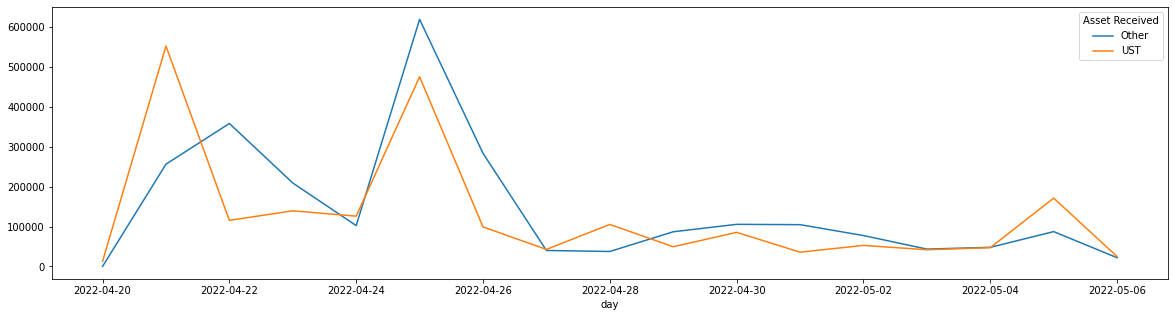

In [95]:
plt.rcParams["figure.figsize"] = (20, 5)
df = gold.groupby(['day','Asset Received'])['PRISM Swapped'].sum().reset_index()
df_chart = df.pivot(columns='Asset Received', values='PRISM Swapped', index='day')\
             .fillna(0)
df_chart.plot(kind='line')

In [96]:
time_duration_chart = alt.Chart(df).mark_line(point = True).encode(
    x=alt.X('day:T'),
    y=alt.X('PRISM Swapped:Q'),
    color=alt.Color('Asset Received:N', 
                sort=['UST','Other'],
                legend=alt.Legend(
                            orient='none',
                            padding=5,
                            legendY=0,
                            direction='horizontal')),
                tooltip=[alt.Tooltip('day:T', format='%Y-%m-%d %H:%M'),'PRISM Swapped:Q','Asset Received:N']
).properties(width=800).configure_view(strokeOpacity=0)
time_duration_chart

alt.Chart(...)